In [59]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [104]:
data = pd.read_csv("donnees_mensuration.csv", delimiter=";")
data.head()

,age,genre,poids,taille,ventre,hanche,epaule,chaussures,locomotion,sport
0,28,Masculin,"60,5",176.0,72.0,79.0,44.0,42,Pieds ou Vélo,OUI
1,28,Féminin,"66,4",159.0,81.0,106.0,43.8,39,Voiture ou Moto,NON
2,32,Féminin,"80,1",166.0,92.0,107.2,46.0,39,Voiture ou Moto,NON
3,23,Masculin,"56,15",173.8,67.0,90.5,52.0,41,Pieds ou Vélo,OUI
4,7,Féminin,22,125.0,56.0,63.0,30.0,33,Pieds ou Vélo,OUI


In [105]:
data = data[['age', 'taille', 'genre']]
data.head()

,age,taille,genre
0,28,176.0,Masculin
1,28,159.0,Féminin
2,32,166.0,Féminin
3,23,173.8,Masculin
4,7,125.0,Féminin


In [92]:
data.isna().sum()

age       0
taille    0
genre     0
dtype: int64

In [93]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,810.0,18.723457,7.713989,1.0,13.25,19.0,23.0,64.0
taille,810.0,157.756086,17.300666,54.5,151.00,161.0,169.0,196.5


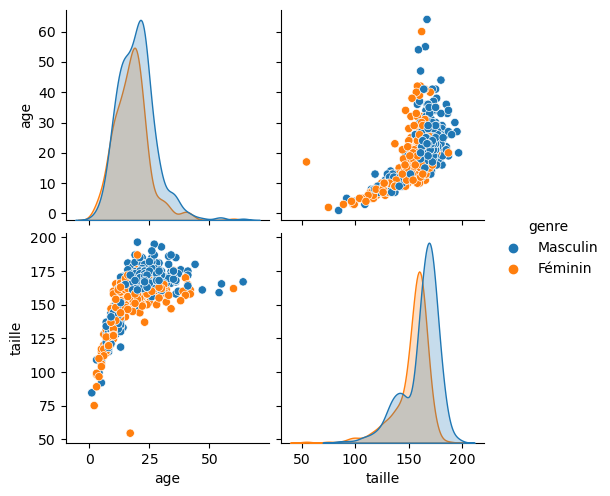

In [94]:
sns.pairplot(data, hue='genre')

In [95]:
data.corr().style.background_gradient()

C:\Users\HP\AppData\Local\Temp\ipykernel_22132\84807061.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr().style.background_gradient()


,age,taille
age,1.000000,0.631570
taille,0.631570,1.000000


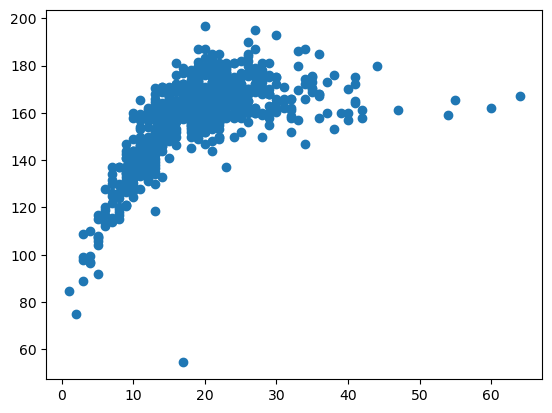

In [96]:
plt.figure()
plt.scatter( (data[['age']]),  (data[['taille']]))

In [97]:
def f(par):
    t_max, age_ref = par[0], par[1]
    age = np.array(data['age'])
    taille = np.array(data['taille'])
    return np.sum((taille - (t_max*(1 - np.exp(-(age/age_ref)))))**2)

C:\Users\HP\AppData\Local\Temp\ipykernel_22132\3831841041.py:6: RuntimeWarning: divide by zero encountered in divide
  return np.sum((taille - (t_max*(1 - np.exp(-(age/age_ref)))))**2)


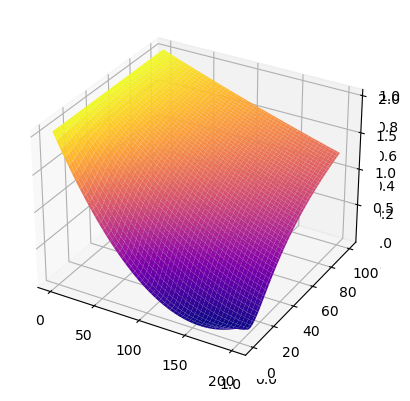

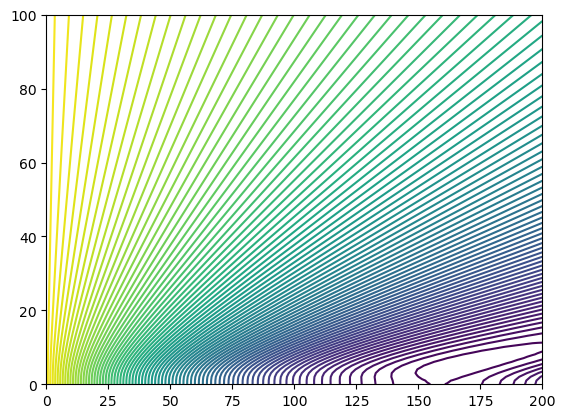

In [98]:
from mpl_toolkits.mplot3d import Axes3D
ax = plt.axes(projection = '3d')

t_max = np.linspace(0, 200, 100)
age_ref = np.linspace(0, 100, 100)
t_max, age_ref = np.meshgrid(t_max, age_ref)
F = []
for i in range(100):
    a = []
    for j in range(100):
        a.append(f([t_max[i, j], age_ref[i, j]]))
    F.append(a)
F = np.array(F)       
ax = plt.axes(projection = '3d')
ax.plot_surface(t_max, age_ref, F,cmap = "plasma")
plt.figure()
plt.contour(t_max, age_ref, F, 100)

In [99]:
from scipy import optimize

In [112]:
resultat = optimize.minimize(f, [10, 1]).x 
print(resultat)

[169.65309265   5.56381699]


C:\Users\HP\AppData\Local\Temp\ipykernel_22132\3831841041.py:6: RuntimeWarning: overflow encountered in exp
  return np.sum((taille - (t_max*(1 - np.exp(-(age/age_ref)))))**2)
C:\Users\HP\AppData\Local\Temp\ipykernel_22132\3831841041.py:6: RuntimeWarning: overflow encountered in multiply
  return np.sum((taille - (t_max*(1 - np.exp(-(age/age_ref)))))**2)
C:\Users\HP\AppData\Local\Temp\ipykernel_22132\3831841041.py:6: RuntimeWarning: overflow encountered in square
  return np.sum((taille - (t_max*(1 - np.exp(-(age/age_ref)))))**2)


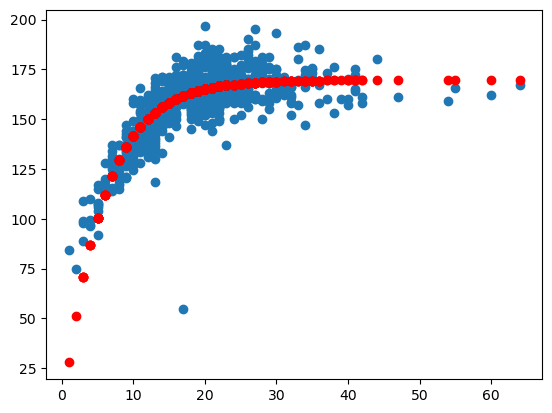

In [101]:
plt.figure()
plt.scatter( (data[['age']]),  (data[['taille']]))
age = np.array(data[['age']])
t_max, age_ref = resultat[0], resultat[1]
taille_pred = t_max*(1- np.exp(-age/age_ref))
plt.scatter(age, taille_pred, c = 'red' )

In [102]:
def gradient_f(x, h = 0.1):
    x = list(x)
    dev_x1 = (f([x[0]+h, x[1]]) - f([x[0]-h, x[1]]))/(2*h)
    dev_x2 = (f([x[0], x[1]+h]) - f([x[0], x[1]-h]))/(2*h)
    return np.array([dev_x1, dev_x2])

              i          t_max       age_ref
999995   999996 -123062.729074 -16624.435747
999996   999997 -123062.753928 -16624.439101
999997   999998 -123062.778782 -16624.442456
999998   999999 -123062.803636 -16624.445810
999999  1000000 -123062.828490 -16624.449164


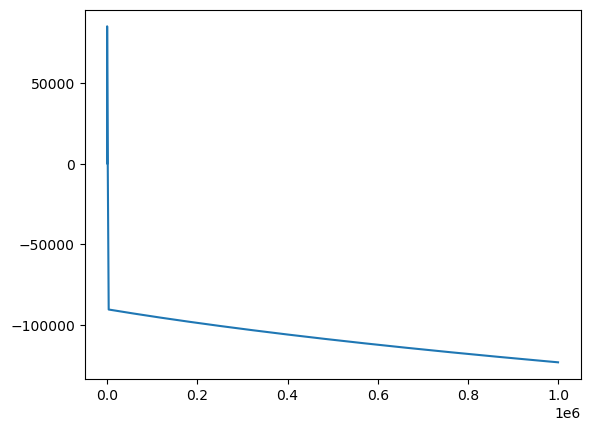

In [111]:
x = np.array([100, 2])
alpha = 0.9
iteration = 1000000
nb_int, X = [], []
for i in range(iteration):
    nb_int.append(i+1)
    X.append(x)
    x = x - alpha*gradient_f(x)
X = np.array(X)
dataN = pd.DataFrame({'i': nb_int, 't_max': X[:,0], 'age_ref': X[:,1]})
print(dataN.tail())
plt.plot(dataN['i'], dataN['t_max'])

In [ ]:
knn_model.predict(X_train)